<a href="https://colab.research.google.com/github/VieiraEduardo/ArvoreDeDecisao.ipynb/blob/main/Projeto13ArvoreDeDecis%C3%A3o_Cifose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto 13 - Cifose - Árvores de decisão##

Dataset extraido do kaggle - Dataset Cifose

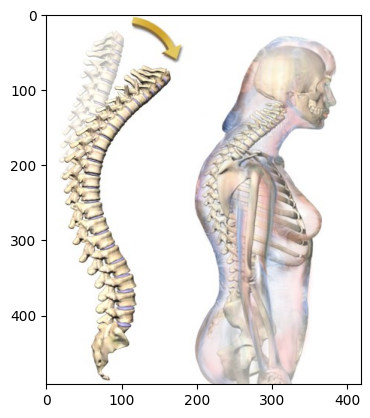

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = '/content/cifose.jpg'
img = Image.open(image)
plt.imshow(img)


### Descrição do Problema

Cifose é uma curvatura convexa anormalmente excessiva da coluna vertebral, também conhecida como "corcunda". O dataset de cifose possui 81 linhas e 4 colunas, representando dados sobre crianças que passaram por cirurgia corretiva na coluna vertebral. O conjunto de dados contém 3 entradas e 1 saída.

ENTRADAS:
- Age (idade): em meses
- Number (número): o número de vértebras envolvidas
- Start (inicio): o número da primeira (mais superior) vértebra operada.

SAÍDAS:
- kyphosis (Cifose): um fator com níveis "ausente" (absent) ou "presente" (present), indicando se uma cifose (um tipo de deformação) estava presente após a operação.

In [ ]:
# bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para treinamento do modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

# para evitar mensagens de alerta/warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Carregar o módulo de funções para limpeza de dados
from limpeza_dados import *

In [ ]:
import kagglehub

##Obtendo Dados##

In [ ]:
#Carregando o Dataset
df = pd.read_csv('kyphosis.csv')

In [ ]:
#Para ver o inicio dos dados
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
#Para ver o final dos dados
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
#Resumo estatístico dos dados
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
#Descrição dos campos do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
#Calcular se existe valores nulos
calcular_porcentagem_valores_ausentes(df)

O conjunto de dados tem 0.0% de valores ausentes.


In [ ]:
#Calcular a relação de valores ausentes por coluna
relatorio_valores_ausentes_por_coluna(df)

O conjunto de dados tem 4 colunas. 
Foram encontradas 0 colunas com valores ausentes.


,Quantidade de Ausentes,Porcentagem de Ausentes,Tipo de Dado


##Exploração dos dados##

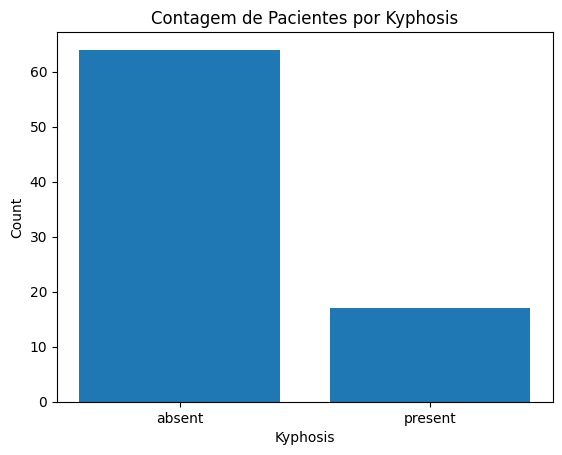

In [ ]:
#Contagem simples dos pacientes
#Calcular a contagem de cada categoria
counts = df['Kyphosis'].value_counts()

#Plotar o gráfico de barras
plt.bar(counts.index, counts.values)
plt.xlabel('Kyphosis')
plt.ylabel('Count')
plt.title('Contagem de Pacientes por Kyphosis')
plt.show()

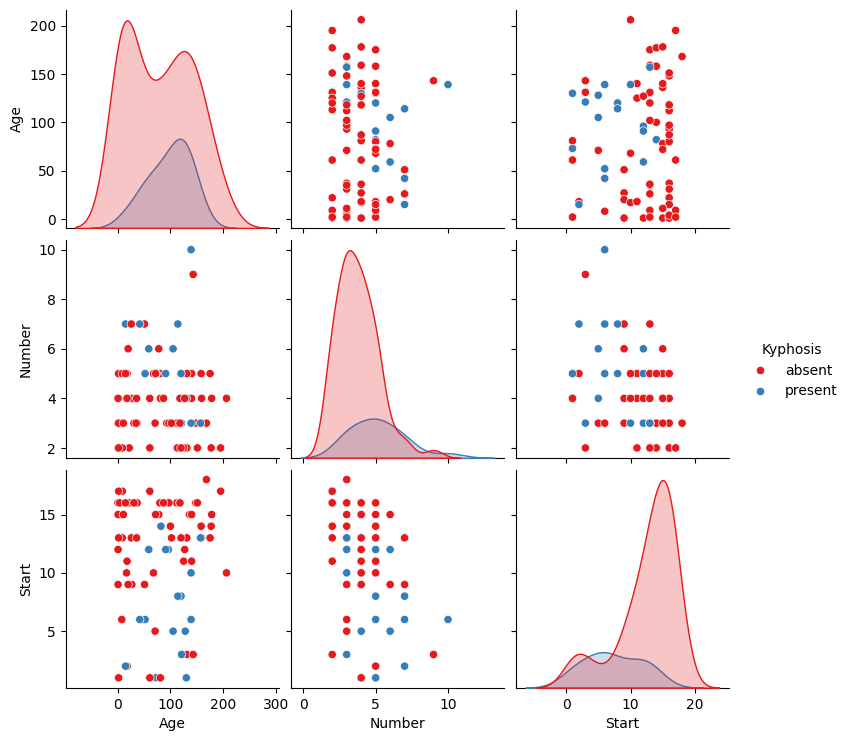

In [ ]:
#Análise de distribuição
sns.pairplot(df, hue='Kyphosis', palette='Set1')
plt.show()

<Axes: >

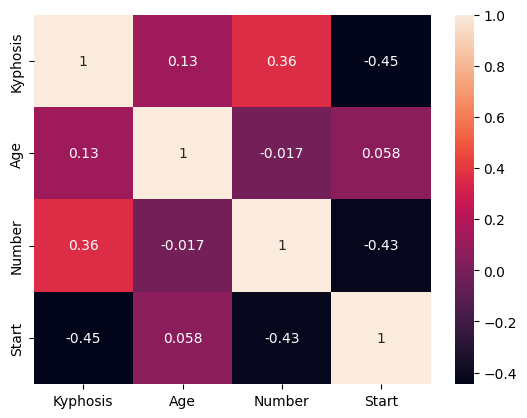

In [ ]:
#Análise de correlação

#Para mostrar o mapa de correlação temos que fazer uma modificação dos dados da variável kyphosis
#É necessário transforma-lo em valores númericos

#Fazer uma cópia do dataset
df_numerico = df.copy()

#Nessa cópia precisa alterar os valores absent - 0 e present - 1
df_numerico['Kyphosis'] = df_numerico['Kyphosis'].map({'absent': 0, 'present': 1})

#Calcular a correlação
sns.heatmap(df_numerico.corr(), annot=True)


##Divisão em treino e teste##

In [ ]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
#Reservar 30% do dataset para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

##Criando o modelo de decisão##

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
#treinando o modelo
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

##Predição e avaliação##

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
(classification_report(y_test,predictions))


'              precision    recall  f1-score   support\n\n      absent       0.86      0.86      0.86        21\n     present       0.25      0.25      0.25         4\n\n    accuracy                           0.76        25\n   macro avg       0.55      0.55      0.55        25\nweighted avg       0.76      0.76      0.76        25\n'

In [ ]:
acu = dtree.score(x_test, y_test)


In [ ]:
#Acurácia do modelo
(f"Acurácia do Modelo: {acu:.1%}")


'Acurácia do Modelo: 76.0%'

In [ ]:
#Mostrando a matriz de confusão (textualmente)
(confusion_matrix(y_test,predictions))


array([[18,  3],
       [ 3,  1]])

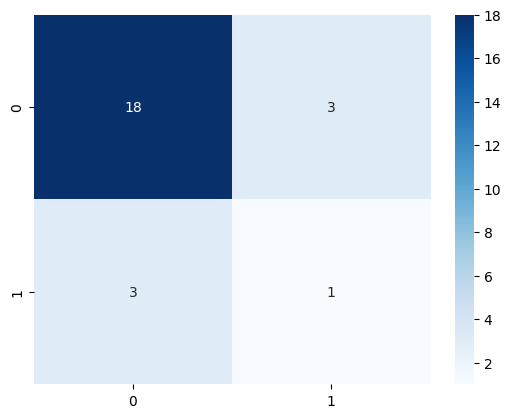

In [ ]:
#Mostrando a matriz de confusão (graficamente)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='Blues',fmt='g')
plt.show()


**Verdadeiro: 0, Previsto: 0 (18):** Isso significa que o modelo classificou corretamente 18 amostras como Classe 0.

**Verdadeiro: 0, Previsto: 1 (3):** Isso significa que o modelo classificou incorretamente 3 amostras que eram da Classe 0 como Classe 1.

**Verdadeiro: 1, Previsto: 0 (3):** Isso significa que o modelo classificou incorretamente 3 amostras que eram da Classe 1 como Classe 0.

**Verdadeiro: 1, Previsto: 1 (1):** Isso significa que o modelo classificou corretamente 1 amostras como Classe 1.